In [ ]:
# Mount Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import math
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

## Exploratory Data Analysis

### Overview of the Dataset

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/IT_Code_Fair_2024/encoded_dataset.csv')
df.head()

,Salary,NumberOfVacancies,Flexibility,Remoteness,Region,Vacancy6MonthsOrLess,Department,ClassificationLevel,Animal and Horticulture,Engineering,...,Administration and Business Services,Executive and Senior Management,Program and Project Management,Probation and Parole Officer,Science,Agriculture,Nursing and Midwifery,VacancyType,NumberOfApplicants,Success
0,154922,1.0,0,1,1,0,4,3,0,0,...,1,0,0,0,0,0,0,2,3,0
1,118256,1.0,0,0,3,1,8,1,0,0,...,1,0,0,0,0,0,0,1,18,0
2,118256,1.0,0,0,3,0,0,1,0,0,...,1,0,0,0,0,0,0,1,6,1
3,91927,1.0,0,0,3,0,3,1,0,0,...,0,0,0,0,0,0,0,3,10,1
4,109710,4.0,1,2,0,0,3,0,0,0,...,0,0,0,0,0,0,0,1,17,1


In [ ]:
# Dataset size
df.shape

(9219, 56)

In [ ]:
# Check if there's any missing values or abnormal data and check datatypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 56 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Salary                                          9219 non-null   int64  
 1   NumberOfVacancies                               9219 non-null   float64
 2   Flexibility                                     9219 non-null   int64  
 3   Remoteness                                      9219 non-null   int64  
 4   Region                                          9219 non-null   int64  
 5   Vacancy6MonthsOrLess                            9219 non-null   int64  
 6   Department                                      9219 non-null   int64  
 7   ClassificationLevel                             9219 non-null   int64  
 8   Animal and Horticulture                         9219 non-null   int64  
 9   Engineering                              

In [ ]:
# Check dataset size
df.shape

(9219, 56)

Now, the dataset has 9219 rows and 56 columns.

In [ ]:
# Descriptive Statistics
df.describe()

,Salary,NumberOfVacancies,Flexibility,Remoteness,Region,Vacancy6MonthsOrLess,Department,ClassificationLevel,Animal and Horticulture,Engineering,...,Administration and Business Services,Executive and Senior Management,Program and Project Management,Probation and Parole Officer,Science,Agriculture,Nursing and Midwifery,VacancyType,NumberOfApplicants,Success
count,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.0,9219.000000,...,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000,9219.000000
mean,113333.981234,1.264562,0.066819,0.592364,2.648443,0.148823,3.804426,0.731750,0.0,0.009329,...,0.272698,0.018983,0.016162,0.004339,0.001627,0.009546,0.090248,1.933398,15.616987,0.624363
std,38559.189689,3.058973,0.249721,0.829727,0.896560,0.355933,3.207755,0.918318,0.0,0.096138,...,0.445371,0.136471,0.126106,0.065731,0.040306,0.097239,0.286553,1.009346,31.786109,0.484313
min,24000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88290.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,103447.000000,1.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000
75%,133553.000000,1.000000,0.000000,1.000000,3.000000,0.000000,6.000000,1.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,18.000000,1.000000
max,383864.000000,201.000000,1.000000,2.000000,5.000000,1.000000,13.000000,3.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1403.000000,1.000000


In [ ]:
# Function to find outliers in each column
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return column[(column < lower_bound) | (column > upper_bound)]

# Function to print out the number of outliers
def print_outlier_counts(dataframe):
    # Consider all columns
    columns_to_check = dataframe.columns

    for column in columns_to_check:
        if dataframe[column].dtype in ['float64', 'int64']:  # Checks if the column is numeric
            outliers = find_outliers(dataframe[column])
            print(f"The column '{column}' has {len(outliers)} outliers.")

In [ ]:
print_outlier_counts(df)

The column 'Salary' has 380 outliers.
The column 'NumberOfVacancies' has 748 outliers.
The column 'Flexibility' has 616 outliers.
The column 'Remoteness' has 0 outliers.
The column 'Region' has 516 outliers.
The column 'Vacancy6MonthsOrLess' has 1372 outliers.
The column 'Department' has 0 outliers.
The column 'ClassificationLevel' has 408 outliers.
The column 'Animal and Horticulture' has 0 outliers.
The column 'Engineering' has 86 outliers.
The column 'Cadetship and Graduate Programs' has 0 outliers.
The column 'Grants and Contract Management' has 0 outliers.
The column 'Allied Health and Health Care Services' has 794 outliers.
The column 'Hospitality and Food Services' has 32 outliers.
The column 'Community Services' has 134 outliers.
The column 'Communication' has 124 outliers.
The column 'Transport and Logistics' has 20 outliers.
The column 'Payroll' has 11 outliers.
The column 'Tourism and Culture' has 54 outliers.
The column 'Information and Communication Technology (ICT)' has 2

## Building Classification Models

### Balancing Data

Balancing data ensures the model doesn't become biased toward the majority class, leading to more accurate and fair predictions across all classes.

#### Before Data Balancing

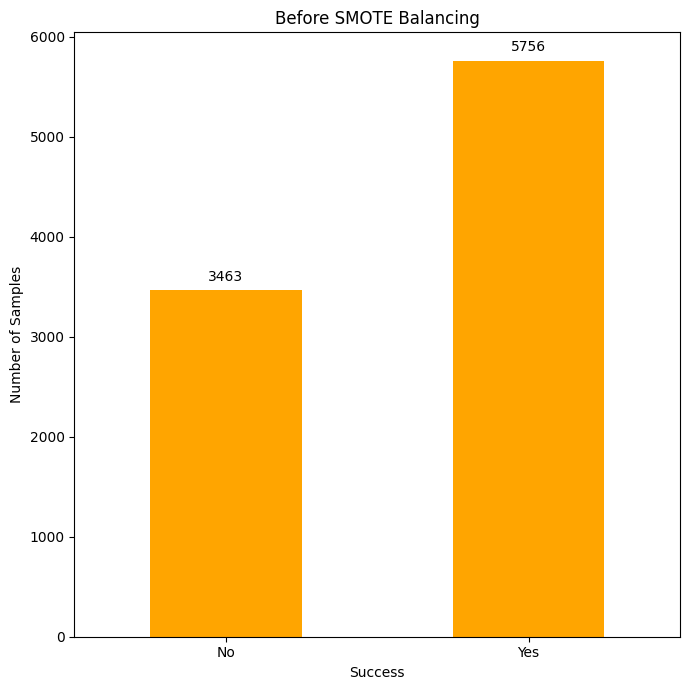

In [ ]:
# Check the balance of 2 subsets in the dataset.
label_counts = df['Success'].value_counts().sort_index()  # Ensure the labels are sorted

plt.figure(figsize=(7, 7))
ax = label_counts.plot(kind='bar', color='orange')  # 'ax' captures the plot axes
plt.title('Before SMOTE Balancing')
plt.xlabel('Success')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(2), labels=['No', 'Yes'], rotation=0)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### After SMOTE Balancing

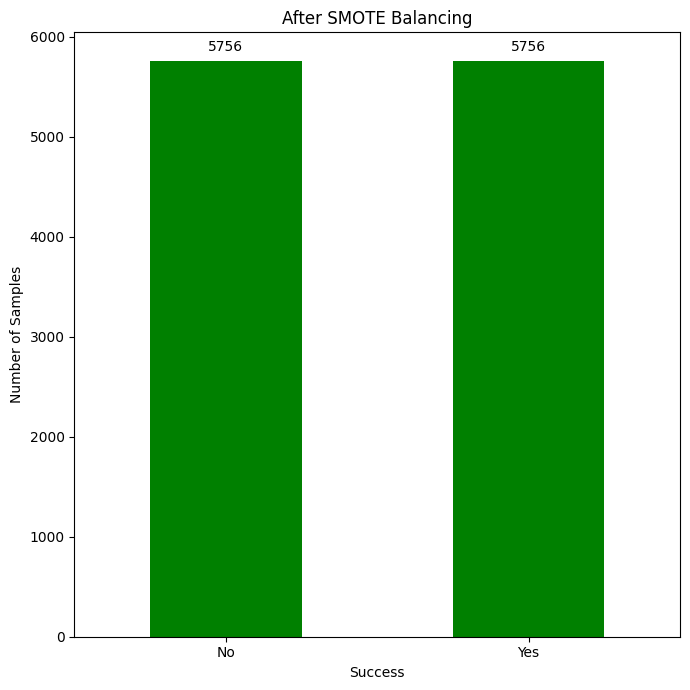

In [ ]:
df['Success'] = df['Success'].astype(int)

# Separate feataures and the target variable
X = df.drop('Success', axis=1)
y = df['Success']

# Apply SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert y_resampled to a DataFrame and count the occurrences of each class
y_resampled_df = pd.DataFrame(y_resampled, columns=['Success'])
label_counts_resampled = y_resampled_df['Success'].value_counts().sort_index()

# Plot the balanced data
plt.figure(figsize=(7, 7))
ax = label_counts_resampled.plot(kind='bar', color='green')  # 'ax' captures the plot axes
plt.title('After SMOTE Balancing')
plt.xlabel('Success')
plt.ylabel('Number of Samples')

# Set custom x-tick labels
plt.xticks(ticks=range(2), labels=['No', 'Yes'], rotation=0)

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Naive Bayes

In [ ]:
# Function to run Gaussian Naive Bayes Model
def GNB(X, y):
    # Identify numerical columns for standardization
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X_numerical = X[numerical_cols]

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=0)

    # Standardising the numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Gaussian Naive Bayes model
    gnb = GaussianNB()

    # Applying 5-fold cross-validation
    cv_results = cross_validate(gnb, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

    # Training the model on the full training data
    gnb.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = gnb.predict(X_test_scaled)

    # Evaluation metrics
    accuracy_NB = accuracy_score(y_test, y_pred)
    precision_NB = precision_score(y_test, y_pred, average='macro')
    recall_NB = recall_score(y_test, y_pred, average='macro')
    f1_NB = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy_NB)
    print("Precision:", precision_NB)
    print("Recall:", recall_NB)
    print("F1-Score:", f1_NB)

    return accuracy_NB, precision_NB, recall_NB, f1_NB

In [ ]:
# Before SMOTE balancing
accuracy_NB1, precision_NB1, recall_NB1, f1_NB1 = GNB(X, y)

Accuracy: 0.40563991323210413
Precision: 0.540423956467833
Recall: 0.5117654429269515
F1-Score: 0.3457292587954827


In [ ]:
# After SMOTE balancing
accuracy_NB2, precision_NB2, recall_NB2, f1_NB2 = GNB(X_resampled, y_resampled)

Accuracy: 0.5293095961788971
Precision: 0.5879376140700182
Recall: 0.5391993491428821
F1-Score: 0.45962838861615457


=> Naive Bayes model's performance is better after SMOTE sampling.

### Logistic Regression

In [ ]:
# Function to run Logistic Regression Model
def logistic_regression(X, y):
    # Identify numerical columns for standardization
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X_numerical = X[numerical_cols]

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=0)

    # Standardising the numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Logistic Regression model
    log_reg = LogisticRegression(random_state=0)

    # Applying 5-fold cross-validation
    cv_results = cross_validate(log_reg, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

    # Training the model on the full training data
    log_reg.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = log_reg.predict(X_test_scaled)

    # Evaluation metrics
    accuracy_LR = accuracy_score(y_test, y_pred)
    precision_LR = precision_score(y_test, y_pred, average='macro')
    recall_LR = recall_score(y_test, y_pred, average='macro')
    f1_LR = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy_LR)
    print("Precision:", precision_LR)
    print("Recall:", recall_LR)
    print("F1-Score:", f1_LR)

    return accuracy_LR, precision_LR, recall_LR, f1_LR

In [ ]:
# Before SMOTE balancing
accuracy_LR1, precision_LR1, recall_LR1, f1_LR1 = logistic_regression(X, y)

Accuracy: 0.661062906724512
Precision: 0.6401408088802096
Recall: 0.5854216263626112
F1-Score: 0.5746879353451855


In [ ]:
# After SMOTE balancing
accuracy_LR2, precision_LR2, recall_LR2, f1_LR2 = logistic_regression(X_resampled, y_resampled)

Accuracy: 0.6873643074250977
Precision: 0.6871319786219043
Recall: 0.6869836878180136
F1-Score: 0.6870323869461687


=> Logistic Regression model's performance is better after SMOTE sampling.

### Decision Tree

In [ ]:
# Function to run Decision Tree Model
def decision_tree(X, y):
    # Identify numerical columns for standardization
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X_numerical = X[numerical_cols]

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=0)

    # Standardising the numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=0)

    # Applying 5-fold cross-validation
    cv_results = cross_validate(dt_model, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

    # Training the model on the full training data
    dt_model.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = dt_model.predict(X_test_scaled)

    # Evaluation metrics
    accuracy_DT = accuracy_score(y_test, y_pred)
    precision_DT = precision_score(y_test, y_pred, average='macro')
    recall_DT = recall_score(y_test, y_pred, average='macro')
    f1_DT = f1_score(y_test, y_pred, average='macro')

    print("Decision Tree - Accuracy:", accuracy_DT)
    print("Decision Tree - Precision:", precision_DT)
    print("Decision Tree - Recall:", recall_DT)
    print("Decision Tree - F1-Score:", f1_DT)

    return accuracy_DT, precision_DT, recall_DT, f1_DT

In [ ]:
# Before SMOTE balancing
accuracy_DT1, precision_DT1, recall_DT1, f1_DT1 = logistic_regression(X, y)

Accuracy: 0.661062906724512
Precision: 0.6401408088802096
Recall: 0.5854216263626112
F1-Score: 0.5746879353451855


In [ ]:
# After SMOTE balancing
accuracy_DT2, precision_DT2, recall_DT2, f1_DT2 = logistic_regression(X_resampled, y_resampled)

Accuracy: 0.6873643074250977
Precision: 0.6871319786219043
Recall: 0.6869836878180136
F1-Score: 0.6870323869461687


=> Decision Tree model's performance is better after SMOTE sampling.

### Random Forest

#### Weighted avaraging

In [ ]:
# Function to run Random Forests model with weighted averaging
def RF_weighted(X, y):
    # Split the train, test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Initialize the Random Forest classifier
    rfc = RandomForestClassifier(random_state=0)

    # Applying 5-fold cross-validation
    cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'))

    # Training the model on the full training data
    rfc.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = rfc.predict(X_test)

    # Evaluation metrics with weighted averaging
    accuracy_RF = accuracy_score(y_test, y_pred)
    precision_RF = precision_score(y_test, y_pred, average='weighted')
    recall_RF = recall_score(y_test, y_pred, average='weighted')
    f1_RF = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy:", accuracy_RF)
    print("Precision:", precision_RF)
    print("Recall:", recall_RF)
    print("F1-Score:", f1_RF)

    return rfc, accuracy_RF, precision_RF, recall_RF, f1_RF

In [ ]:
# Call the function
rfc0, accuracy_RF0, precision_RF0, recall_RF0, f1_RF0 = RF_weighted(X, y)

Accuracy: 0.6795010845986985
Precision: 0.6703218953165022
Recall: 0.6795010845986985
F1-Score: 0.6711200472312001


#### After SMOTE balancing

In [ ]:
# Function to run Random Forests model
def RF(X, y):
    # For Random Forest, preprocessing like standardisation is not necessary
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Initialise the Random Forest classifier
    rfc = RandomForestClassifier(random_state=0)

    # Applying 5-fold cross-validation
    cv_results = cross_validate(rfc, X_train, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

    # Training the model on the full training data
    rfc.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = rfc.predict(X_test)

    # Evaluation metrics
    accuracy_RF_smote = accuracy_score(y_test, y_pred)
    precision_RF_smote = precision_score(y_test, y_pred, average='macro')
    recall_RF_smote = recall_score(y_test, y_pred, average='macro')
    f1_RF_smote = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy_RF_smote)
    print("Precision:", precision_RF_smote)
    print("Recall:", recall_RF_smote)
    print("F1-Score:", f1_RF_smote)

    return accuracy_RF_smote, precision_RF_smote, recall_RF_smote, f1_RF_smote

In [ ]:
# Call the function
accuracy_RF_smote, precision_RF_smote, recall_RF_smote, f1_RF_smote = RF(X_resampled, y_resampled)

Accuracy: 0.7420755536257057
Precision: 0.7419250558168904
Recall: 0.7417333448048409
F1-Score: 0.7418017192305892


=> Random Forest model's performance is better after SMOTE sampling.

### K-Nearest Neighbors

In [ ]:
# Function to run KNN model
def KNN(X, y):
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Standardizing the features because KNN is sensitive to the scale of the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the K-Nearest Neighbors classifier
    knn = KNeighborsClassifier()

    # Applying 5-fold cross-validation
    cv_results = cross_validate(knn, X_train_scaled, y_train, cv=5,
                                scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

    # Training the model on the full training data
    knn.fit(X_train_scaled, y_train)

    # Predicting on the test set
    y_pred = knn.predict(X_test_scaled)

    # Evaluation metrics
    accuracy_KNN = accuracy_score(y_test, y_pred)
    precision_KNN = precision_score(y_test, y_pred, average='macro')
    recall_KNN = recall_score(y_test, y_pred, average='macro')
    f1_KNN = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy_KNN)
    print("Precision:", precision_KNN)
    print("Recall:", recall_KNN)
    print("F1-Score:", f1_KNN)

    return accuracy_KNN, precision_KNN, recall_KNN, f1_KNN

In [ ]:
# Before SMOTE balancing
accuracy_KNN1, precision_KNN1, recall_KNN1, f1_KNN1 = logistic_regression(X, y)

Accuracy: 0.661062906724512
Precision: 0.6401408088802096
Recall: 0.5854216263626112
F1-Score: 0.5746879353451855


In [ ]:
# After SMOTE balancing
accuracy_KNN2, precision_KNN2, recall_KNN2, f1_KNN2 = logistic_regression(X_resampled, y_resampled)

Accuracy: 0.6873643074250977
Precision: 0.6871319786219043
Recall: 0.6869836878180136
F1-Score: 0.6870323869461687


=> K-Nearest Neighbors model's performance is better after SMOTE sampling.

### Artificial Neural Network

#### Before SMOTE databalancing

In [ ]:
# Splitting the dataset into features and target
X = df.drop(columns=['Success'])
y = df['Success']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features (this is important for ANN models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()

# Use the Input layer to specify the input shape
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer (1 neuron since it's binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy: 0.7055
Precision: 0.7230
Recall: 0.8557
F1 Score: 0.7838


#### After SMOTE balancing

In [ ]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Scale the features (this is important for ANN models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model2
model2 = Sequential()

# Use the Input layer to specify the input shape
model2.add(Input(shape=(X_train.shape[1],)))

# Hidden layers
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(8, activation='relu'))

# Output layer (1 neuron since it's binary classification)
model2.add(Dense(1, activation='sigmoid'))

# Compile the model2
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model2
model2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict on test data
y_pred_prob = model2.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Calculate metrics
accuracy_ann = accuracy_score(y_test, y_pred)
precision_ann = precision_score(y_test, y_pred)
recall_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy_ann:.4f}')
print(f'Precision: {precision_ann:.4f}')
print(f'Recall: {recall_ann:.4f}')
print(f'F1 Score: {f1_ann:.4f}')

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.7273
Precision: 0.6895
Recall: 0.8528
F1 Score: 0.7625


=> Artificial Neural Network model's performance is better after SMOTE sampling.

### Compare models to choose the best one

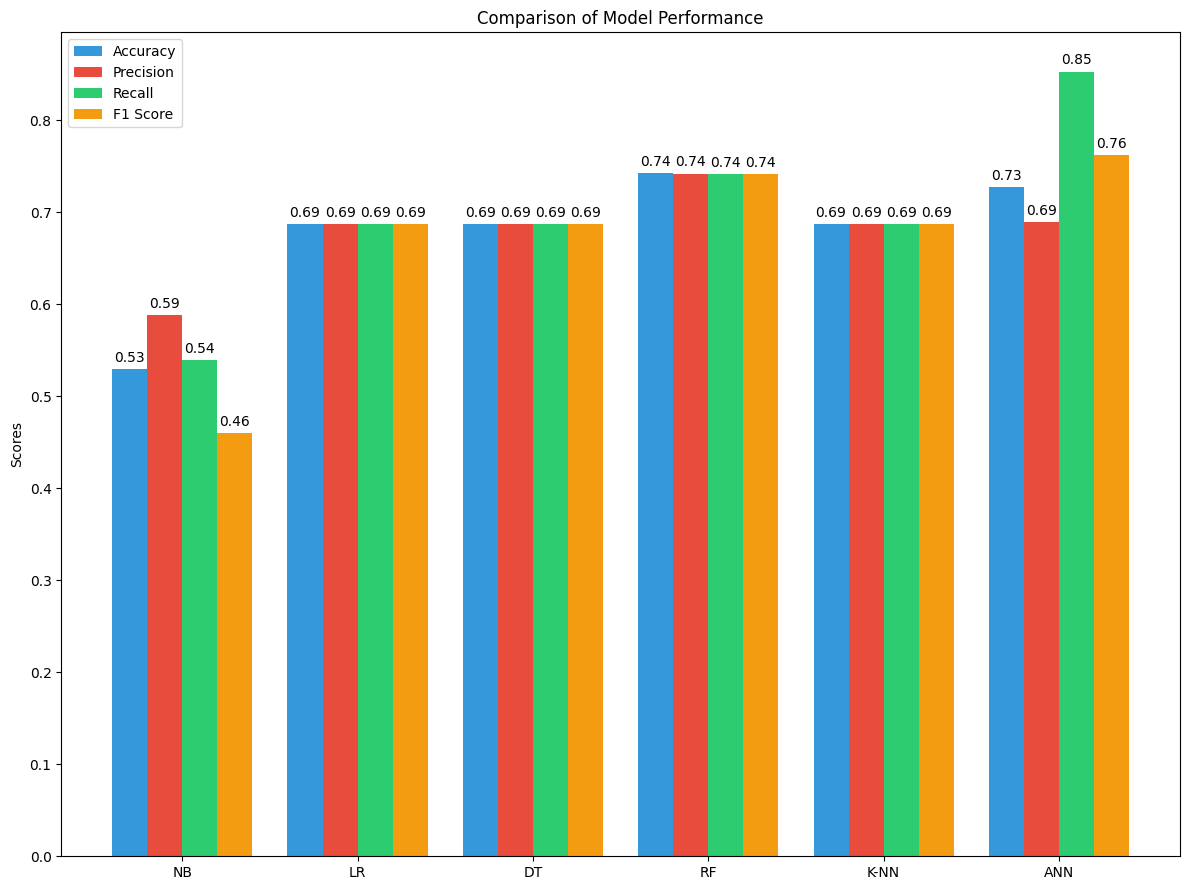

NB = Naive Bayes; LR = Logistic Regression; DT = Decision Tree; RF = Random Forest; K-NN = K-Nearest Neighbors; ANN: Aritificial Neural Network


In [ ]:
# Labels for the groups
labels = ['NB', 'LR', 'DT', 'RF', 'K-NN', 'ANN']

# The data for each group
accuracy = [accuracy_NB2, accuracy_LR2, accuracy_DT2, accuracy_RF_smote, accuracy_KNN2, accuracy_ann]
precision = [precision_NB2, precision_LR2, precision_DT2, precision_RF_smote, precision_KNN2, precision_ann]
recall = [recall_NB2, recall_LR2, recall_DT2, recall_RF_smote, recall_KNN2, recall_ann]
f1_score = [f1_NB2, f1_LR2, f1_DT2, f1_RF_smote, f1_KNN2, f1_ann]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

# Plotting the bars with customized colors
fig, ax = plt.subplots(figsize=(12, 9))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='#3498db')  # Blue
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision', color='#e74c3c')  # Red
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall', color='#2ecc71')  # Green
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='#f39c12')  # Orange

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

# Function to add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

print('NB = Naive Bayes; LR = Logistic Regression; DT = Decision Tree; RF = Random Forest; K-NN = K-Nearest Neighbors; ANN: Aritificial Neural Network')

.

=> Random Forest has the best performance compared to other models.

Conclusion: Choose Random Forest (RF) over ANN because:
- Higher accuracy: RF outperforms ANN in terms of accuracy (74% vs. 73%), which is the primary metric in this case.
- Better generalization: RF tends to generalize better without the risk of overfitting as much as ANN.
- Easier tuning and faster computation: RF requires less tuning and is faster to train and evaluate, making it more practical.
- More interpretable: RF provides feature importance scores, offering better insights into the model's decision-making process compared to ANN.

### Feature Selection based on feature importance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_resampled and y_resampled are already defined after applying SMOTE

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Initialize the Random Forest model
rfc_smote = RandomForestClassifier(random_state=0)

# Apply 5-fold cross-validation
cv_results = cross_validate(rfc_smote, X_train, y_train, cv=5,
                            scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

# Train the model on the full training data
rfc_smote.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc_smote.predict(X_test)

# Calculate evaluation metrics
accuracy_RF_smote = accuracy_score(y_test, y_pred)
precision_RF_smote = precision_score(y_test, y_pred, average='macro')
recall_RF_smote = recall_score(y_test, y_pred, average='macro')
f1_RF_smote = f1_score(y_test, y_pred, average='macro')

# Print evaluation results
print("Accuracy:", accuracy_RF_smote)
print("Precision:", precision_RF_smote)
print("Recall:", recall_RF_smote)
print("F1-Score:", f1_RF_smote)

Accuracy: 0.7420755536257057
Precision: 0.7419250558168904
Recall: 0.7417333448048409
F1-Score: 0.7418017192305892


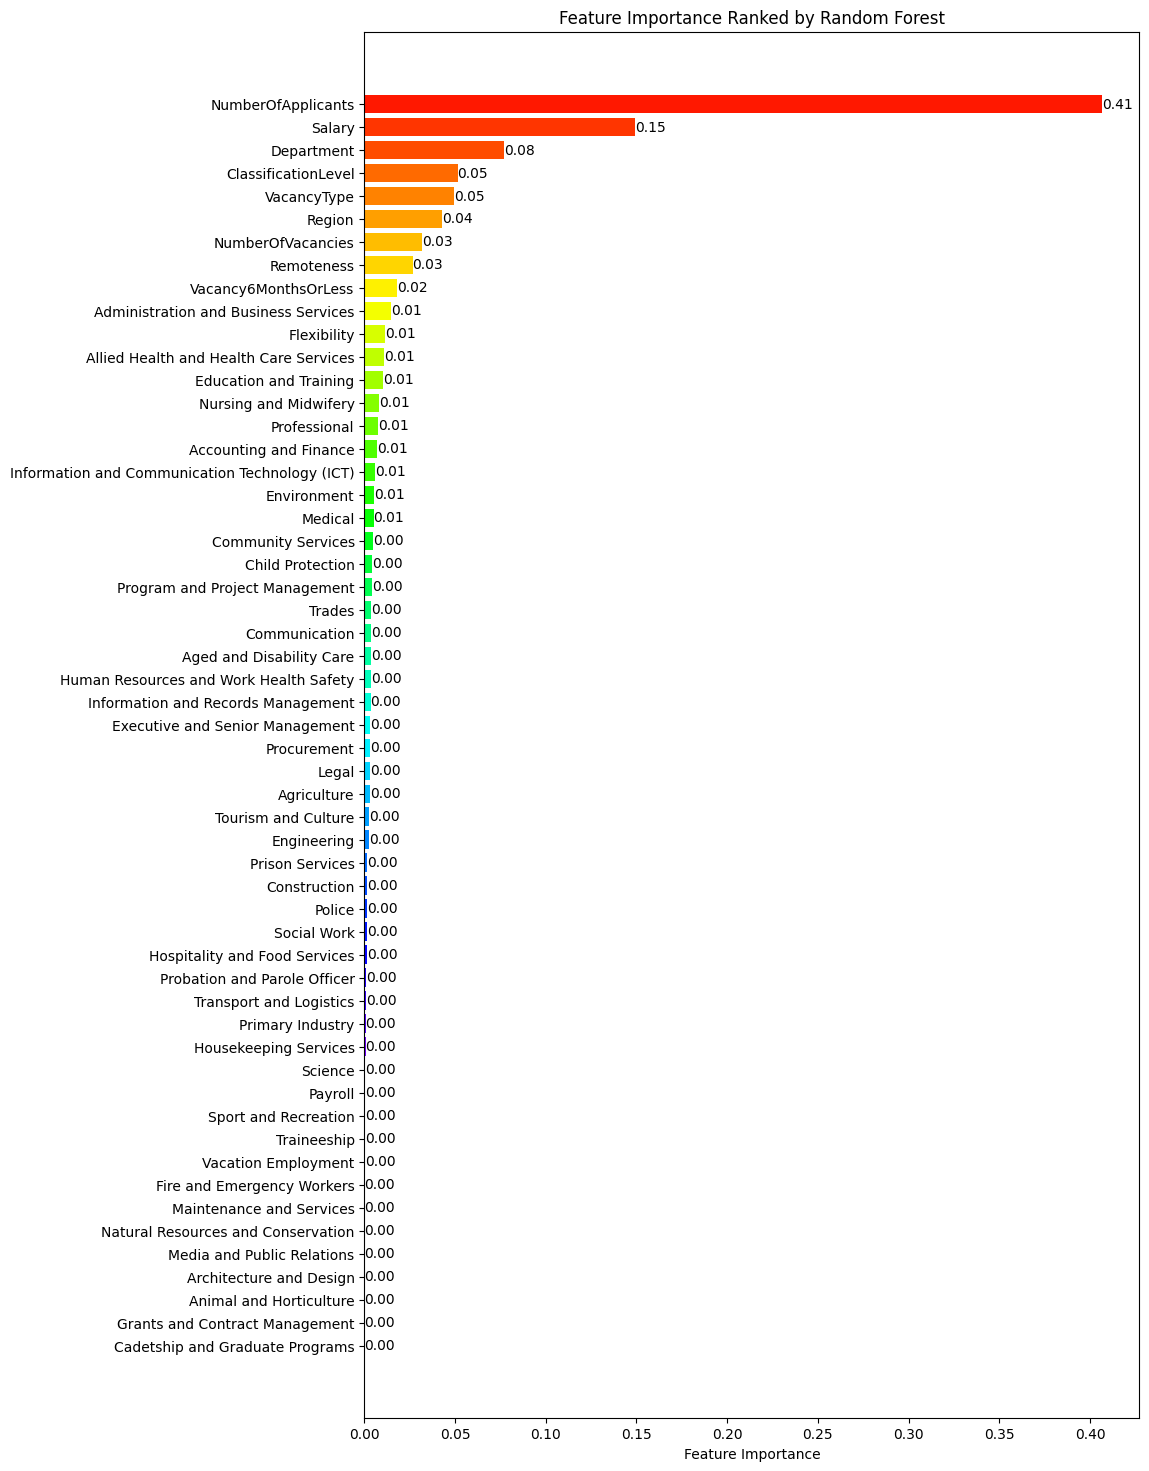

In [ ]:
# Get feature importance
feature_importances = rfc_smote.feature_importances_

# Get feature names
feature_names = X.columns.tolist()

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[index] for index in sorted_idx]

# Generate a color palette with enough colors
colors = sns.color_palette("hsv", len(sorted_feature_names))

# Plotting
plt.figure(figsize=(10, 18))
bars = plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, color=colors, align='center')

# Add labels to the bars
for bar, value in zip(bars, sorted_feature_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             '{:.2f}'.format(value),  # Format the value to 2 decimal places
             va='center', ha='left')

plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Ranked by Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top

plt.show()

In [ ]:
# Get feature importance
feature_importances = rfc_smote.feature_importances_

# Get feature names
feature_names = X.columns.tolist()

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[index] for index in sorted_idx]

# Print sorted feature names
for feature in sorted_feature_names:
    print(feature)

NumberOfApplicants
Salary
Department
ClassificationLevel
VacancyType
Region
NumberOfVacancies
Remoteness
Vacancy6MonthsOrLess
Administration and Business Services
Flexibility
Allied Health and Health Care Services
Education and Training
Nursing and Midwifery
Professional
Accounting and Finance
Information and Communication Technology (ICT)
Environment
Medical
Community Services
Child Protection
Program and Project Management
Trades
Communication
Aged and Disability Care
Human Resources and Work Health Safety
Information and Records Management
Executive and Senior Management
Procurement
Legal
Agriculture
Tourism and Culture
Engineering
Prison Services
Construction
Police
Social Work
Hospitality and Food Services
Probation and Parole Officer
Transport and Logistics
Primary Industry
Housekeeping Services
Science
Payroll
Sport and Recreation
Traineeship
Vacation Employment
Fire and Emergency Workers
Maintenance and Services
Natural Resources and Conservation
Media and Public Relations
Arch

#### Feature Selection

##### Apply forward feature selection technique

Number of features: 1, Accuracy: 0.6617
Number of features: 2, Accuracy: 0.6691
Number of features: 3, Accuracy: 0.6856
Number of features: 4, Accuracy: 0.6947
Number of features: 5, Accuracy: 0.7130
Number of features: 6, Accuracy: 0.7277
Number of features: 7, Accuracy: 0.7360
Number of features: 8, Accuracy: 0.7425
Number of features: 9, Accuracy: 0.7434
Number of features: 10, Accuracy: 0.7390
Number of features: 11, Accuracy: 0.7360
Number of features: 12, Accuracy: 0.7399
Number of features: 13, Accuracy: 0.7290
Number of features: 14, Accuracy: 0.7330
Number of features: 15, Accuracy: 0.7347
Number of features: 16, Accuracy: 0.7403
Number of features: 17, Accuracy: 0.7351
Number of features: 18, Accuracy: 0.7304
Number of features: 19, Accuracy: 0.7377
Number of features: 20, Accuracy: 0.7347
Number of features: 21, Accuracy: 0.7334
Number of features: 22, Accuracy: 0.7312
Number of features: 23, Accuracy: 0.7351
Number of features: 24, Accuracy: 0.7395
Number of features: 25, A

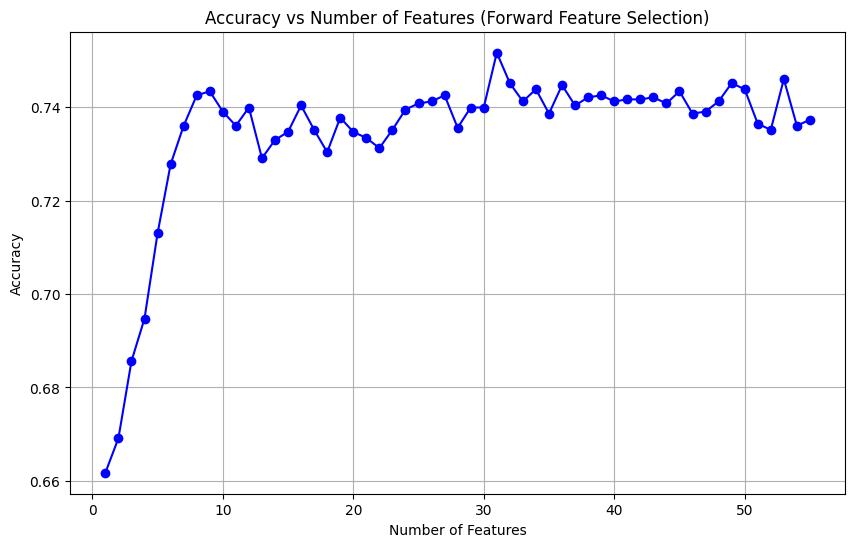

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# List of features in the order provided
feature_order = [
    'NumberOfApplicants', 'Salary', 'Department', 'VacancyType', 'ClassificationLevel', 'Region',
    'NumberOfVacancies', 'Remoteness', 'Vacancy6MonthsOrLess', 'Administration and Business Services',
    'Flexibility', 'Education and Training', 'Allied Health and Health Care Services',
    'Nursing and Midwifery', 'Accounting and Finance', 'Professional',
    'Information and Communication Technology (ICT)', 'Environment', 'Child Protection',
    'Community Services', 'Program and Project Management', 'Medical', 'Legal',
    'Human Resources and Work Health Safety', 'Trades', 'Aged and Disability Care', 'Communication',
    'Procurement', 'Agriculture', 'Executive and Senior Management',
    'Information and Records Management', 'Engineering', 'Tourism and Culture',
    'Prison Services', 'Construction', 'Police', 'Probation and Parole Officer',
    'Hospitality and Food Services', 'Transport and Logistics', 'Social Work',
    'Primary Industry', 'Housekeeping Services', 'Science', 'Payroll', 'Sport and Recreation',
    'Traineeship', 'Vacation Employment', 'Fire and Emergency Workers',
    'Grants and Contract Management', 'Maintenance and Services', 'Media and Public Relations',
    'Architecture and Design', 'Animal and Horticulture', 'Natural Resources and Conservation',
    'Cadetship and Graduate Programs'
]

# Assuming X_resampled is a DataFrame with all the features and y_resampled is the target
# Prepare to collect accuracy scores as features are added
accuracies = []
num_features = []

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Perform forward feature selection
selected_features = []
for i, feature in enumerate(feature_order):
    selected_features.append(feature)

    # Create a subset of the data with the selected features
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Initialize and train the Random Forest model
    rfc_smote = RandomForestClassifier(random_state=0)
    rfc_smote.fit(X_train_subset, y_train)

    # Predict on the test set
    y_pred = rfc_smote.predict(X_test_subset)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    num_features.append(len(selected_features))

    # Print progress
    print(f"Number of features: {len(selected_features)}, Accuracy: {accuracy:.4f}")

# Plotting the accuracy vs number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features (Forward Feature Selection)')
plt.grid(True)
plt.show()

=> It can be seen that the model with 8 features has a high accuracy 74.08%. The model's performance is not improved much if there are more predictors.

In [ ]:
# Select the first 8 features based on the forward selection results
selected_8_features = feature_order[:8]

# Print the selected 8 features
print("Selected Features (First 8):")
for feature in selected_8_features:
    print(feature)

# Create a subset of the data with the selected 8 features
X_train_subset = X_train[selected_8_features]
X_test_subset = X_test[selected_8_features]

# Initialize and train the Random Forest model
rfc_smote = RandomForestClassifier(random_state=0)
rfc_smote.fit(X_train_subset, y_train)

# Predict on the test set
y_pred = rfc_smote.predict(X_test_subset)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nEvaluation Metrics for Model with 8 Most Significant Features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Selected Features (First 8):
NumberOfApplicants
Salary
Department
VacancyType
ClassificationLevel
Region
NumberOfVacancies
Remoteness

Evaluation Metrics for Model with 8 Most Significant Features:
Accuracy: 0.7425
Precision: 0.7423
Recall: 0.7423
F1-Score: 0.7423


=> The best random forest model has the accuracy of 74.08% with 8 predictors:
NumberOfApplicants, Salary, Department, VacancyType, ClassificationLevel, Region, NumberOfVacancies, Remoteness

#### Confusion Matrix

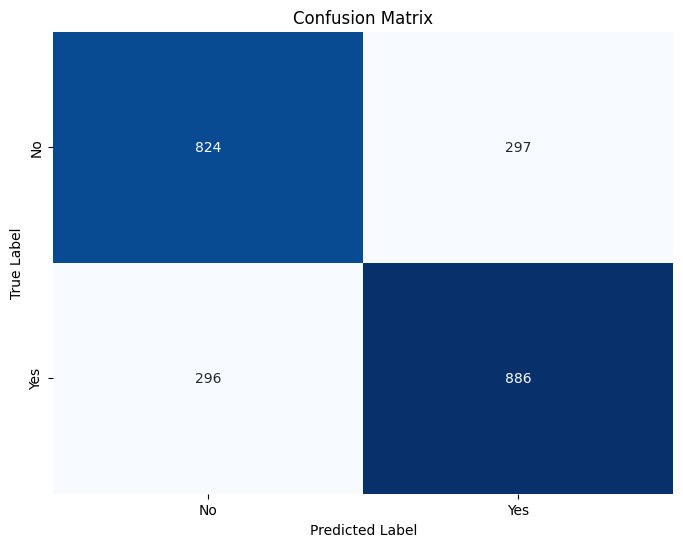

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Model Optimisation: Hyper-parameters Tuning

##### Random Search

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc_smote,
    param_distributions=param_grid,
    n_iter=200,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=0,
    verbose=2
)

# Fit the random search model
start_time = time()
random_search.fit(X_train, y_train)
end_time = time()

# Get the best estimator
best_rfc = random_search.best_estimator_

# Predict using the best estimator
y_pred_optimized = best_rfc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_optimized)

# Print the classification report and best parameters
print(report)
print(f"Best parameters: {random_search.best_params_} with score: {random_search.best_score_:.4f}")
print(f"Time taken for RandomizedSearchCV: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1121
           1       0.73      0.82      0.77      1182

    accuracy                           0.75      2303
   macro avg       0.76      0.75      0.75      2303
weighted avg       0.76      0.75      0.75      2303

Best parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None} with score: 0.7547
Time taken for RandomizedSearchCV: 228.08 seconds


Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc_smote,
    param_grid=param_grid,  # Use param_grid for exhaustive search
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the grid search model
start_time = time()
grid_search.fit(X_train, y_train)
end_time = time()

# Get the best estimator
best_rfc = grid_search.best_estimator_

# Predict using the best estimator
y_pred_optimized = best_rfc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_optimized)

# Print the classification report and best parameters
print(report)
print(f"Best parameters: {grid_search.best_params_} with score: {grid_search.best_score_:.4f}")
print(f"Time taken for GridSearchCV: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 750 candidates, totalling 3750 fits
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1121
           1       0.73      0.82      0.77      1182

    accuracy                           0.75      2303
   macro avg       0.76      0.75      0.75      2303
weighted avg       0.76      0.75      0.75      2303

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500} with score: 0.7547
Time taken for GridSearchCV: 826.87 seconds


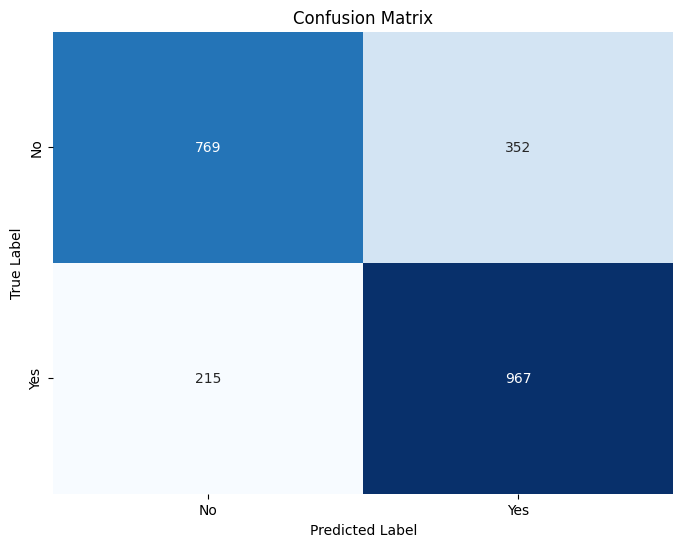

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()